In [1]:
# Import Necessary Libraries
import numpy as np
import os, csv, json

from matplotlib import *
from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import KernelDensity

from sklearn import cluster
from scipy.spatial import distance
import sklearn.datasets
from sklearn.preprocessing import StandardScaler

import pandas as pd

#### Set up R Independence Test 
np.random.seed(12345678)  # for reproducibility, set random seed
from rpy2 import robjects
from rpy2.robjects import r

# pretty charting
import seaborn as sns
sns.set_palette('muted')
sns.set_style('darkgrid')

%matplotlib inline

In [2]:
from pprint import pprint
# channel = ['Synap','Synap','VGlut1','VGlut1','VGlut2','Vglut3',
#            'psd','glur2','nmdar1','nr2b','gad','VGAT', 'PV','Gephyr',
#            'GABAR1','GABABR','CR1','5HT1A', 'NOS','TH','VACht',
#            'Synapo','tubuli','DAPI']

channel = ['Synap_01','Synap_02','VGlut1_01','VGlut1_02','VGlut2','Vglut3',
           'psd','glur2','nmdar1','nr2b','gad','VGAT', 'PV','Gephyr',
           'GABAR1','GABABR','CR1','5HT1A', 'NOS','TH','VACht',
           'Synapo','tubuli','DAPI']

channeltype = ['ex.pre','ex.pre','ex.pre','ex.pre','ex.pre','in.pre.small', 
               'ex.post','ex.post','ex.post','ex.post','in.pre','in.pre', 
               'in.pre','in.post','in.post','in.post','in.pre.small','other',
               'ex.post','other','other','ex.post','none','none']
print(channel)
print(channeltype)

['Synap_01', 'Synap_02', 'VGlut1_01', 'VGlut1_02', 'VGlut2', 'Vglut3', 'psd', 'glur2', 'nmdar1', 'nr2b', 'gad', 'VGAT', 'PV', 'Gephyr', 'GABAR1', 'GABABR', 'CR1', '5HT1A', 'NOS', 'TH', 'VACht', 'Synapo', 'tubuli', 'DAPI']
['ex.pre', 'ex.pre', 'ex.pre', 'ex.pre', 'ex.pre', 'in.pre.small', 'ex.post', 'ex.post', 'ex.post', 'ex.post', 'in.pre', 'in.pre', 'in.pre', 'in.post', 'in.post', 'in.post', 'in.pre.small', 'other', 'ex.post', 'other', 'other', 'ex.post', 'none', 'none']


In [4]:
channel_inhib_excit = ['ex.pre','ex.pre','ex.pre','ex.pre','ex.pre','in.pre.small', 
               'ex.post','ex.post','ex.post','ex.post','in.pre','in.pre', 
               'in.pre','in.post','in.post','in.post']

# get only the channels with known excitatory and inhibitory
channeltype = np.array(channeltype)
inhib_excit_indices = [idx for idx, x in enumerate(channeltype) if x in channel_inhib_excit]

print "The column numbers of inhib/excit proteins: ", inhib_excit_indices

The column numbers of inhib/excit proteins:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 21]


## Load in Data And Cluster And Evaluate
1. load in data
2. cluster using k-means 4, 5, 6
3. compare the histogram distributions of excit/inhib values in each cluster

In [6]:
data = np.load('../../data/synapse_f0_features_log.npy')
X = data  # extract only the features
X = X[:,inhib_excit_indices]
print 'data has shape: ', X.shape

# set options and then cluster
num_clusters = 4
colors = ['#4EACC5', '#FF9C34', '#4E9A06', '#11111']
kmeans = cluster.MiniBatchKMeans(n_clusters = num_clusters, init="k-means++")
kmeans.fit(X)


# extract the data after fitting
k_means_labels = kmeans.labels_
k_means_cluster_centers = kmeans.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)

for k, col in zip(range(num_clusters), colors):
    print k
    print col
##### PLOT #####
fig = plt.figure()
ax = plt.gca()
ax.grid(False)
# plt.scatter(X[:,2], X[:,3], marker='o', color='k', label='data (n=%i)' %(len(X)))
# plt.plot(X[:,2], fit_fn_vglut(X[:,2]), '--x', label='line-regression (r=%0.2f)' %(vglut_r_value))

ax.set_xlabel('VGlut1 (first measurement)')
ax.set_ylabel('VGlut1 (second measurement)')
ax.set_title('Integrated Brightness Clustering With ' + num_clusters + ' centers Using MiniBatchKMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.tight_layout()


print "For f0 features log transformed"

data has shape:  (1119299, 19)


NameError: name 'n_clusters' is not defined

(19,)
(19,)
(19,)
(19,)
For f0 features log transformed


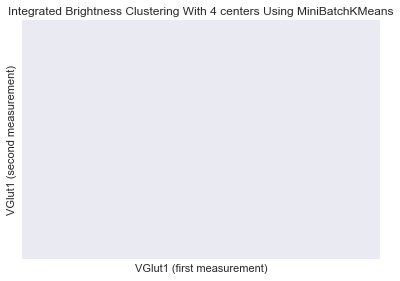

In [11]:
for k, col in zip(range(num_clusters), colors):
    my_members = k_means_labels == k # get indices of this current cluster membership
    cluster_center = k_means_cluster_centers[k] # get current cluster center

    print cluster_center.shape

##### PLOT #####
fig = plt.figure()
ax = plt.gca()
ax.grid(False)
# plt.scatter(X[:,2], X[:,3], marker='o', color='k', label='data (n=%i)' %(len(X)))
# plt.plot(X[:,2], fit_fn_vglut(X[:,2]), '--x', label='line-regression (r=%0.2f)' %(vglut_r_value))

ax.set_xlabel('VGlut1 (first measurement)')
ax.set_ylabel('VGlut1 (second measurement)')
ax.set_title('Integrated Brightness Clustering With ' + str(num_clusters) + ' centers Using MiniBatchKMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.tight_layout()

print "For f0 features log transformed"